# The Hecksher-Ohlin-Samuelson (HOS) Model

Math derivations and visualization

[Code Section](#Code-Section)

### Technology and Endowments
Two sectors A and M (e.g. Aeronatutics and light-manufacturing). Linear homogenous (CRS) production functions. 

$$
Q_a = F(K_a, L_a) \\ Q_m = G(K_m, L_m)
$$

Capital and labor are mobile across sectors.
$$
L_a + L_m = \bar L
$$

$$
K_a + K_m = \bar K
$$

### Cobb-Douglas for visualizations

$$
F(K_a, L_a)= K_a^{\alpha} \cdot  L_a^{1-\alpha}
$$

$$
G(K_m, L_m)=K_m^{\beta} \cdot  L_m^{1-\beta}
$$

FOC for cost-minimization (or profit maximization) in the A industry imply:

$$
\frac{F_L}{F_K} = \frac{1-\alpha}{\alpha} \frac{K_a}{L_a} = \frac{w}{r}
$$

Firms take market relative factor prices $\frac{w}{r}$ and choose the **optimal capital-labor intensity in the A industry** to be:

$$
\frac{K_a}{L_a} = \frac{\alpha}{1-\alpha}  \frac{w}{r}
$$

and **optimal capital intensity in M industry** to be:

$$
\frac{K_m}{L_m} = \frac{\beta}{1-\beta}  \frac{w}{r}
$$

Capital intensity is rising with the market wage-rental ratio $w/r$ in each sector. (i.e. firms adopt more capital-intensive methods the higher are wages relative to rents.

### A visualized example

Assume the A industry is more capital-intensive: $\alpha > \beta$  

Example: $\alpha=0.75, \beta=0.25$

At any given $\frac{w}{r}$ ratio, the A sector is more capital intensive. 
For example at $\frac{w}{r}=1$: 

$$
3=\frac{K_a}{L_a}  \gt \frac{K_m}{L_m} = \frac{1}{3}
$$

#### Optimal capital-intensities in each sector

w/r = 1.00, KLa = 3.00, KLm = 0.33


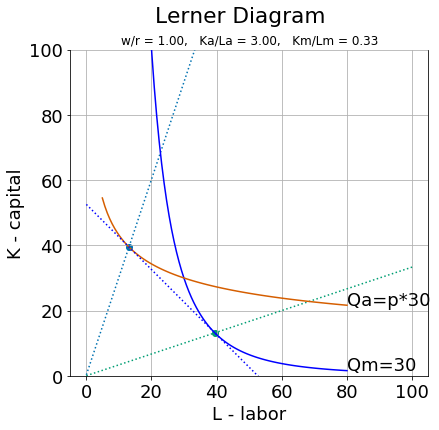

In [19]:
lerner(p=1)

## The Closed Economy 

In a closed economy product prices and factor prices are determined endogenously.

With a relative capital-labor endowment of $\frac{\bar K}{\bar L}=6$ the equilibrium $w/r$ would depend on the relative production (and consumption) of agriculture or manufacturing.  If most production/consumption is manufacturing then the relative wage would be high. According to the diagram below the $w/r$ would lie somewhere between ~2.5 and 9 depending on the relative demand for manufactured goods.

### The Lerner Diagram

This diagram draws representative isoquants for each sector. 

If the market is competitive then price is marginal cost equals average cost in each sector.  Hence if the relative price is $p=\frac{p_m}{p_a}$ then 1 unit of manufacturing should cost as much to make as $p$ units of agricultural goods and the relative wage $w/r$ will have to adjust for that to be true.

### Stolper Samuelson Line


The total cost function in the agricultural sector is:

$$
C_a(w,r, Q_a) = r \cdot K_a + w \cdot L_a
$$

In the Cobb-Douglas constant expenditure case we can write

$$
r \cdot K_a = \alpha \cdot C_a(w,r,Q_a)
$$ 

and 

$$
w \cdot L_a = (1-\alpha) \cdot C_a(w,r,Q_a)
$$

If we substitute for $K_a$ and $L_a$ using these last two expressions into the production function $Q_a = K_a^\alpha L_a^{1-\alpha}$ and re-arrange, we can derive an expression for the cost function:

$$
C_a(w,r,Q_a) = Z_a \cdot Q_a \cdot r^\alpha w^{1-\alpha}
$$

where $Z_a =\alpha^\alpha \cdot (1-\alpha)^{1-\alpha}$

By similar reasoning 

$$
C_m(w,r,Q_a) = Z_m \cdot Q_m \cdot r^\beta w^{1-\beta}
$$

with  $Z_m =\beta^\beta \cdot (1-\beta)^{1-\beta}$

Let $p=\frac{p_m}{p_A}$.  Perfect competition and free entry means zero so that product prices are given by unit costs 

$$
p_m = \frac{C_m}{Q_m},  p_a = \frac{C_a}{Q_a}
$$  

Then using the expressions for the cost function above we can arrive at the **Stolper-Samuelson line**:

$$
p = \frac{Z_m}{Z_a}\left ( \frac{w}{r} \right ) ^{\alpha-\beta}
$$

Or, inverting

$$
\frac{w}{r} = \left ( p \frac{Z_a}{Z_m} \right ) ^\frac{1}{\alpha-\beta}
$$

This tells us the equlibrium relative wage-rental rate consistent with product prices $p$.  Note this relationship depends only on the technology parameters, so if technologies are the same between nations then the Stolper-Samuelson line will be the same as well.  

In [20]:
interact(lerner, p= (0.5,1.5,0.1))

interactive(children=(FloatSlider(value=1.0, description='p', max=1.5, min=0.5), Output()), _dom_classes=('wid…

<function __main__.lerner(p)>

If, as we've assumed, agriculture is more capital intensive, then an increase in the relative price of agricultural goods will lead to an increase in the demand for capital relative to labor and hence a *fall* in the wage-rental ratio.

1.5 2.25


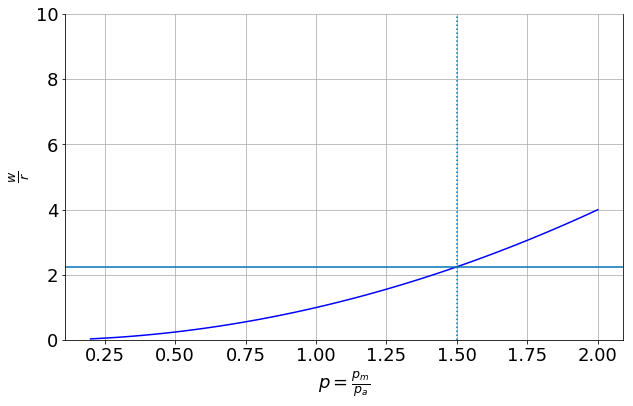

In [21]:
ssplot(1.5)

### World prices to factor prices

When a small country opens to trade its prices become world prices.  An increase in the relative price of the labor-intensive M good leads to the following sequence of causal effects:

$$ p \uparrow \rightarrow \frac{w}{r} \uparrow \rightarrow  \frac{K_a}{L_a} \uparrow, \frac{K_m}{L_m} \uparrow$$

<a id='codesection'></a>
## Code Section

Make sure you run the cells below FIRST.  Then run the cells above

In [1]:
import numpy as np
from scipy.optimize import fsolve, minimize
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import seaborn
%matplotlib inline

C:\Users\jconn\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
plt.style.use('seaborn-colorblind')
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 18
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid']=True

    Optimal capital intensity given wage-rental ratio wr

In [3]:
def kl(wr, kshare):
    return (kshare/(1-kshare))* wr

In [4]:
alpha = 0.75
beta = 0.25

In [5]:
def isoq(L, kshare, qbar):
    return (qbar/(L**(1-kshare)))**(1/kshare)

In [6]:
ll = np.linspace(0.1,100,100)
ll_ = np.linspace(5,80,100)

In [7]:
def klplot(KL):
    wr = np.linspace(0.1,10,100)
    plt.ylabel(r'$\frac{w}{r}$ -- wage-rental')
    plt.xlabel(r'$\frac{K}{L}$')
    plt.xlim(0,10)
    plt.plot(kl(wr, alpha), wr)
    plt.plot(kl(wr, beta), wr)
    plt.axvline(KL)
    plt.text(KL+0.5, 9, r'$\frac{\bar K}{\bar L}$ ')
    plt.gca().set_aspect('equal');

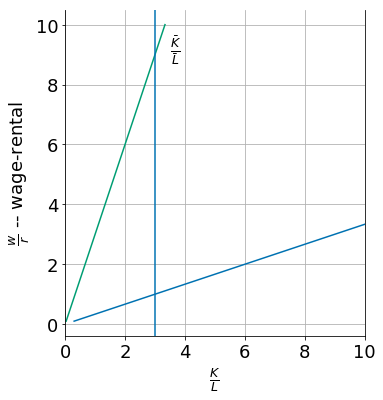

In [8]:
klplot(3)

In [9]:
def SS(p):
    Za = alpha**alpha * (1-alpha)**((1-alpha))
    Zm = beta**beta * (1-beta)**((1-beta))  
    return (p*(Za/Zm))**(1/(alpha-beta))

In [10]:
def lerner(p):
    wr = SS(p=p)
    Kas = kl(wr, alpha)
    Kms = kl(wr, beta)
    QQ=30
    Lmqq = QQ/Kms**beta
    Kmqq = Kms*Lmqq
    Laqq = p*QQ/(Kas**alpha)
    Kaqq = Kas*Laqq

    I = Kmqq + wr*Lmqq
    plt.scatter(Laqq,Kaqq)
    plt.scatter(Lmqq,Kmqq)
    print(f'w/r = {wr:2.2f}, KLa = {Kas:2.2f}, KLm = {Kms:2.2f}')
    plt.ylim(0,100)
    plt.plot(ll, Kas*ll, ':')
    plt.plot(ll, Kms*ll, ':')
    plt.plot(ll_, isoq(ll_,beta, QQ),'b')
    plt.plot(ll_, isoq(ll_,alpha, p*QQ))
    plt.text(ll_[-1],isoq(ll_[-1],beta,QQ),f"Qm={QQ}")
    plt.text(ll_[-1],isoq(ll_[-1],alpha,p*QQ),f"Qa=p*{QQ}")
    plt.plot(ll, I - wr*ll,'b:')
    plt.xlabel('L - labor')
    plt.ylabel('K - capital')
    plt.suptitle('Lerner Diagram', y=0.98)
    plt.title(f'w/r = {wr:2.2f},   Ka/La = {Kas:2.2f},   Km/Lm = {Kms:2.2f}', fontsize = 12)
    plt.gca().set_aspect('equal');

w/r = 1.00, KLa = 3.00, KLm = 0.33


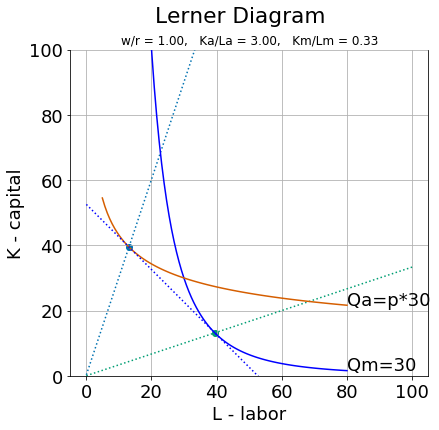

In [11]:
lerner(p=1)

In [12]:
def ssplot(p):
    wr = SS(p=p)
    print(p,wr)
    pp = np.linspace(0.2,2,100)
    plt.plot(pp, SS(pp),'b')
    plt.ylabel(r'$\frac{w}{r}$')
    plt.xlabel(r'$p = \frac{p_m}{p_a}$')
    plt.axhline(y = wr, xmin = 0, xmax = p)
    plt.axvline(x = p, ymin=0, ymax =wr, linestyle=':')
    plt.ylim(0,10);

### The Closed economy

The market equilibrium can be solved as the problem of maximizing the representative consumer's utility subject to production and hence consumption being on the PPF: 

$$
\max_{K_a, L_a} U(F(K_a, L_a), G(\bar K - Ka, \bar L - La))
$$

In [13]:
theta = 0.5
Kbar = 100
Lbar = 100

In [14]:
def F(K,L):
    return K**alpha * L**(1-alpha)

def G(K,L):
    return K**beta * L**(1-beta)

def U(Ca,Cm):
    return Ca**theta * Cm**(1-theta) 

def obj(X):
    return - U( F(X[0], X[1]), G(Kbar-X[0], Lbar-X[1]) )

We could solve for this analytically but the math gets messy so let's just use the brute force numerical optimization methods:

In [15]:
x0 = [50,50] # -- guess

sol = minimize(obj, x0)
Kae, Lae  = sol.x

Qae, Qme = F(Kae,Lae), G(Kbar-Kae, Lbar-Lae)
print (f'Kae = {Kae:2.1f}, Lae = {Lae:2.1f}, Qae = {Qae:2.1f}, Qme = {Qme:2.1f}')

Kae = 75.0, Lae = 25.0, Qae = 57.0, Qme = 57.0


## The production possibility

Efficiency in allocation requires that the RTS be equalized in both sectors.  This plus the resource constraints gives us an equation that relates $K_a$ to $L_a$ 

$$
\frac{1-\alpha}{\alpha} \frac{K_a}{L_a} = \frac{1-\beta}{\beta} \frac{\bar K - K_a}{\bar L - L_a} 
$$


$$
\frac{K_a}{L_a} =  \Delta  \frac{\bar K - K_a}{\bar L - L_a} 
$$

where $\Delta =  \frac{\alpha}{1-\alpha}  \frac{1-\beta}{\beta}$


$$
K_a \bar L +(\Delta - 1) K_a L_a =  \Delta  L_a  \bar K  
$$

$$
K_a ( \bar L +(\Delta - 1)  L_a) =  \Delta  L_a  \bar K  
$$

$$
K_a  = \frac{\Delta  L_a  \bar K}{( \bar L +(\Delta - 1)  L_a)}
$$

We can now vary $L_a$ from 0 to $\bar L$ and use the expression above to trace out the efficiency locus in an Edgeworth box, and with that also trace out the PPF

In [16]:
def PPF(La):
    '''Vary La and return F(Ka, La), G(K-Ka, L-La)'''
    Delta = (alpha/beta)*(1-beta)/(1-alpha)
    Ka = (Delta * La * Kbar) / (Lbar +(Delta-1)*La)
    return F(Ka,La), G(Kbar-Ka, Lbar-La)
    

In [17]:
def indif(Cm, theta , ubar):
    return (ubar/(Cm**(1-theta)))**(1/theta)

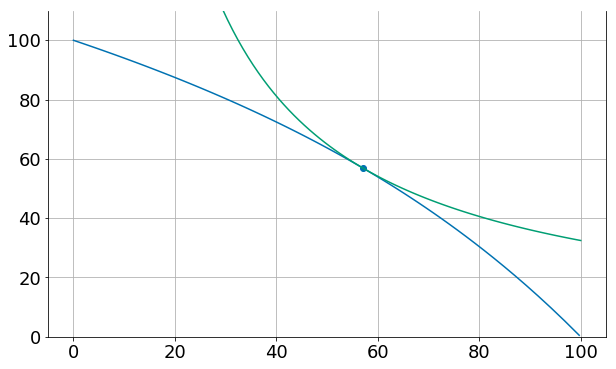

In [18]:
Qa, Qm = PPF(ll)
plt.plot(Qm, Qa)
plt.plot(ll, indif(ll, theta, U(Qae,Qme)) )
plt.ylim(0,110)
plt.scatter(Qme, Qae);